## 서울 지하철 유/무임 승차 데이터
#### T-money 제공
#### 문제1. 유임 승차 비율이 가장 높은 역은 어디일까

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df = df.replace(',','',regex=True)
df = df.dropna() # 누락값이 있는 행은 버린다.
df. shape

(597, 9)

In [13]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20
1,2019-05,1호선,151,시청,709821,727110,112279,112016,2019-06-03 10:56:20
2,2019-05,1호선,152,종각,1204910,1151371,176083,164915,2019-06-03 10:56:20
3,2019-05,1호선,153,종로3가,699000,647664,408682,382809,2019-06-03 10:56:20
4,2019-05,1호선,154,종로5가,561662,578374,307515,295535,2019-06-03 10:56:20


In [14]:
arr = np.array(df) # 배열로 변환
arr.shape, arr[0]

((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

In [21]:
유임승차 = arr[:,4].astype(np.int)
arr[np.argmax(유임승차),3], np.max(유임승차), np.argmax(유임승차)

('강남', 2894341, 31)

In [23]:
무임승차 = arr[:,6].astype(np.int)
arr[np.argmax(무임승차),3], np.max(무임승차), np.argmax(무임승차)

('종로3가', 408682, 3)

In [27]:
유임승차비율 = 유임승차 / (무임승차+1)
arr[np.argmax(유임승차비율),1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

유무임 승하차 인원이 가장 많은 역은 어디일까?

In [33]:
승하차합 = arr[:,4:8].astype(np.int)
승하차합합 = np.sum(승하차합, axis=1)
승하차합, 승하차합합, arr[np.argmax(승하차합합),1:4:2], np.max(승하차합합), np.argmax(승하차합합)

(array([[1568570, 1489737,  247801,  242107],
        [ 709821,  727110,  112279,  112016],
        [1204910, 1151371,  176083,  164915],
        ...,
        [  87982,  103574,   34415,   32373],
        [  35939,   36973,   17275,   17703],
        [  42076,   44785,   23061,   20860]]),
 array([3548215, 1661226, 2697279, 2138155, 1743086, 1034351, 1021248,
        1313148, 1657718,  774535, 1586991, 3157446, 1451720,  775177,
        1361978,  985430,  909251, 1195406,  900239, 1291570, 1907343,
        3088522, 1527250, 2915963, 1053237, 5455044, 1635292, 1122815,
        3886965, 3202850, 3059426, 6234453, 2449940, 1443247, 1354453,
        2937187, 1917359, 3401690, 1533360, 4459139, 1829578, 4011415,
        1925237, 3755440, 1265918, 1407053, 1534132, 2231105, 5392292,
        3123202, 1421470,  707614,  716859,  186568,  108668,  271839,
          77187,  485394,  670383,  153201,   88599, 1403986, 2653821,
        1293354,  869342, 1263201,  269494,  601557, 1773838, 1681403,

모든 역의 유무임승하차 비율은 어떻게 될까 > 파이(유임승차 45%, 무임하차x%)


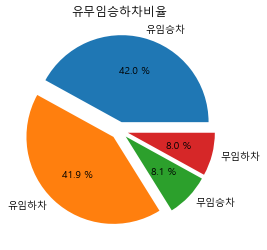

In [45]:
a = np.sum(arr[:,4:8].astype(np.int), axis=0)
#label='사용월','호선명','역ID','지하철역','유임승차','유임하차','무임승차','무임하차','작업일시'
plt.rc('font', family='Malgun Gothic')
plt.title('유무임승하차비율')
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f %%', explode=[0.1, 0.1, 0.1, 0.1] )
plt.savefig('유무임승하차비율.png')

모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기
- 100만명 이상 승차하는 곳만

In [52]:
for i in range(len(arr)):
    row=arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    역이름= row[1] + '_' + row[3]
    if 유임승차 > 1000000:
        plt.rc('font', family='Malgun Gothic')
        plt.title(역이름+'승하차인원')
        n = plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f %%', explode=[0.1, 0.1, 0.1, 0.1] )
        plt.savefig('subway_' + 역이름 +'.png')
        plt.close()
